**Интернет-магазин «Стримчик»**

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# **Изучение данных**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
try:
    df = pd.read_csv('/content/drive/MyDrive/DA/games.csv', sep=',')
except:
    df = pd.read_csv('/datasets/games.csv', sep=',')

*Путем исследования этих данных я хочу спрогнозировать вектор развития нашего интернет-магазина. Чтобы подготовить рекламные кампании на будущий год, необходимо проанализировать данные за предыдущие года и получить данные на основании которых можно смело строить стратегию рекламных кампаний и прогнозировать развитие игровой инустрии.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Отметила столбцы, в которых нужно изменить тип данных и обработать пропуски:**

Name:                     NaN

Platform:                 -

Year_of_Release:          NaN + int

Genre:                    NaN

NA_sales:                 -

EU_sales:                 -

JP_sales:                 -

Other_sales:              -

Critic_Score:             NaN

User_Score:               NaN + float64

Rating:                   NaN

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Описание данных**


Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


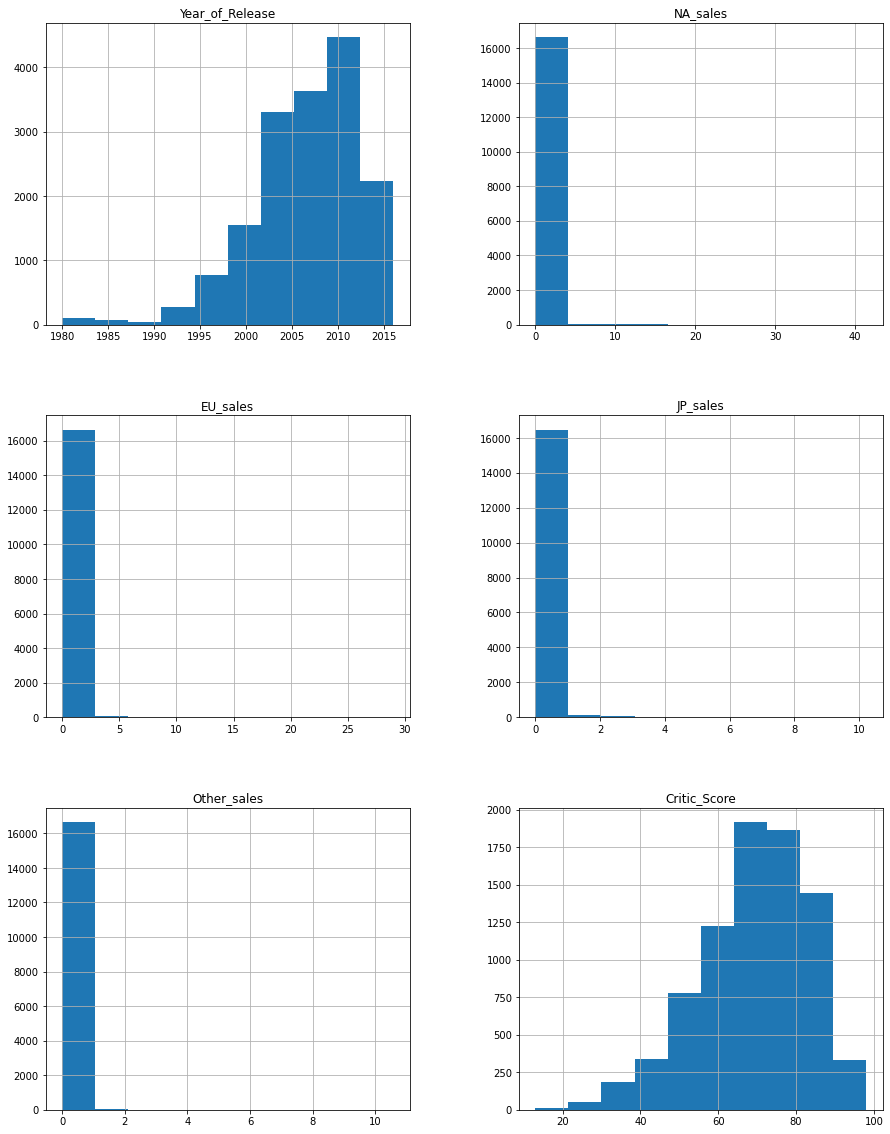

In [ ]:
df.hist(figsize=(15, 20))
plt.show()

*На гистограммах видны пики, а также аномалии, с которыми необходимо разобраться и привести данные в "чистый" вид.*

# **Предобработка данных**

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
df.columns = df.columns.str.lower()
df.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*Переименовала столбцы для удобства.*

In [ ]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df['name'] = df['name'].fillna('no_name')

*Убрала NaN путем замены на 'no_name', т.к. название не играет важной роли для общего анализа.*



In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(1)
df['year_of_release'] = df['year_of_release'].astype('int')

*Заменила NaNы на 1, чтобы не терять и не искажать данные.Также я изменила тип данных на integer, т.к.год не может быть float.*

In [ ]:
df['genre'] = df['genre'].fillna('no_genre')
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
no_genre           2
Name: genre, dtype: int64

*Заменила 2 NaN на 'no_genre' чтобы сохранить данные.*

In [ ]:
df['critic_score'] = df['critic_score'].fillna(111)
df['critic_score'].value_counts()

111.0    8578
70.0      256
71.0      254
75.0      245
78.0      240
         ... 
29.0        3
22.0        1
13.0        1
21.0        1
17.0        1
Name: critic_score, Length: 83, dtype: int64

*Заменила все NaNы на значении 111, это заведомо неправильное значение, т.к. рейтинг от 1 до 100. Я буду учитывать это при дальнешем анализе.*

In [ ]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].fillna(15)
df['user_score'] = df['user_score'].astype('float')
df['user_score'].value_counts()

15.0    9125
7.8      324
8.0      290
8.2      282
8.3      254
        ... 
0.7        2
1.0        2
0.2        2
9.7        1
0.0        1
Name: user_score, Length: 96, dtype: int64

*Заменила все NaNы на значении 15, это заведомо неправильное значение, т.к. рейтинг от 1 до 10. Я буду учитывать это при дальнешем анализе. Также я изменила тип данных на float.*

In [ ]:
df['rating'] = df['rating'].fillna('no_rating')
df['rating'].value_counts()

no_rating    6766
E            3990
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: rating, dtype: int64

*Чтобы не потерять данные и не исказить их, я заменила все NaNы на 'no_rating'.*

In [ ]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

*C NaN-ами разобрались.*

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,111.0,15.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,111.0,15.0,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,111.0,15.0,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,111.0,15.0,no_rating,28.31


*Добавила столбец с суммарными продажами во всех регионах.*

*После изучения данных, могу сказать, что данные достаточно чистые. Имеющиеся пропуски я заполнила таким образом, чтобы не потерять данные. А также я добавила дополнительный столбец 'total_sales' с суммарными продажами, он мне очень пригодится в исследовании.*

# **Исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

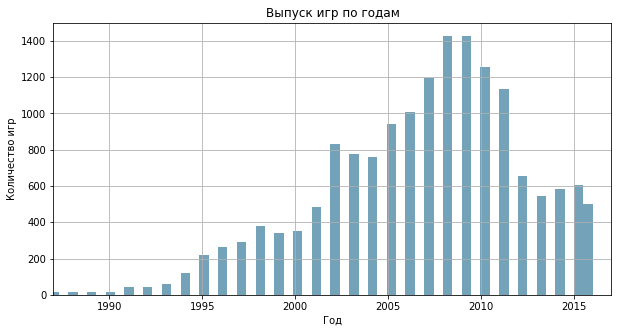

In [ ]:
df['year_of_release'].hist(bins = 4000, figsize = (10, 5), color='#74a2b8')
plt.xlim(1987, 2017)

plt.title('Выпуск игр по годам')
plt.xlabel('Год') 
plt.ylabel('Количество игр')
plt.show()

Судя по количеству игр, до 1995 года данные можно не учитывать, т.к. выпускалось очень мало игр.

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


---



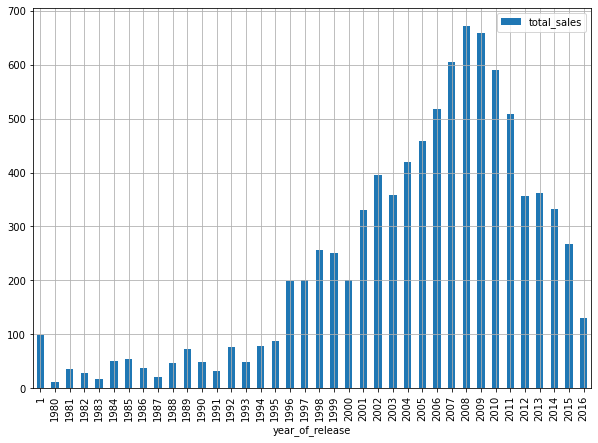

In [ ]:
df.pivot_table(index='year_of_release', values = 'total_sales', aggfunc='sum').plot(kind='bar',figsize=(10, 7))
plt.grid(True)

In [ ]:
good_df = df.groupby('platform')['total_sales'].sum()
good_df = good_df.sort_values(ascending=False).head(10)
good_df

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

*Я вывела 10 платформ с наибольшими суммарными показателями по продажам за актуальный период.*

In [ ]:
temp_df = df.groupby('platform')['total_sales'].sum()
temp_df = temp_df.sort_values(ascending=False).head(10)
top_10 = temp_df.index.tolist()

good_df = df.loc[df['platform'].isin(top_10) & (df['year_of_release'] > 1994)]
good_df.groupby('platform')['total_sales'].sum()

platform
DS       802.76
GBA      312.88
PC       239.79
PS       721.55
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
Wii      891.18
X360     961.24
Name: total_sales, dtype: float64

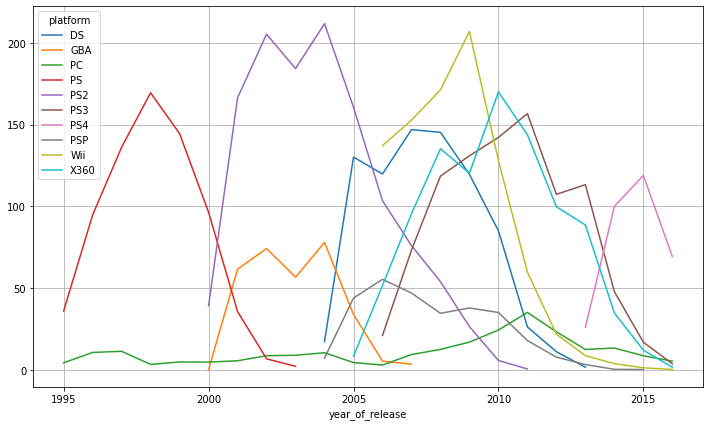

In [ ]:
df_plot = good_df.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
df_plot.plot(figsize=(12, 7))
plt.grid(True)

*Я отсекла все года до 1994, т.к. до 1994 года игровая индустрия была малоразвита и неинформативна. Оставила на диаграмме ТОП-6 платформ с наилучшими показателями продаж. На диаграмме видно что средний срок жизни игровой платформы 7 лет. Пик популярности каждой платформы варьируется от 2х до 4х лет, но у большинства это 3 года.*

- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

- Не учитывайте в работе данные за предыдущие годы.

In [ ]:
good_df = df.loc[df['year_of_release'] > 2013]

*Изучив график выше, я сделала вывод, что средний срок жизни игровой платформы около 7 лет. А пик популярности приходится примерно на 3-3,5 года. Таким образом, для правильного прогнозирования мне нужно минимум 2 года, чтобы понять динамику платформ. А учитывая, что данные за 2016 год не полные, их в расчет я не беру.* 

In [ ]:
good_df = good_df.groupby('platform')['total_sales'].sum()
good_df = good_df.sort_values(ascending=False).head(10)
good_df

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

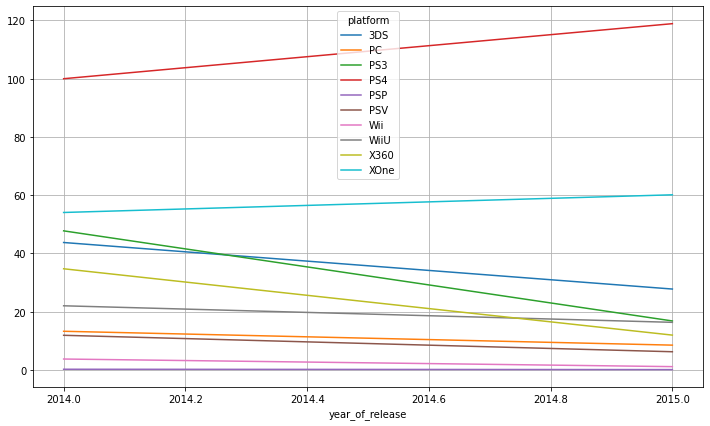

In [ ]:
good_df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] < 2016)]
df_plot = good_df.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
df_plot.plot(figsize=(12, 7))
plt.grid(True)


*Учитывая средний срок жизни игровой платформы, на графике отчетливо видно, что все платформы, кроме PS4 и XOne, находятся на выходе с рынка.*

In [ ]:
good_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,111.0,15.0,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,111.0,15.0,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,111.0,15.0,no_rating,7.98


*Порядок индексов нарушен, нужно сбросить.*

In [ ]:
good_df.reset_index(drop=True, inplace=True)
good_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,111.0,15.0,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,111.0,15.0,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,111.0,15.0,no_rating,7.98


*Индексы сброшены и обновленный датафрейм, с актуальным периодом и информативными данными, готов для дальнейшего анализа. Оставлены года с 2014 и платформы ТОП-8 по сумме продаж копий. На основании этих данных я сделаю прогноз по платформам на 2017 год.*

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

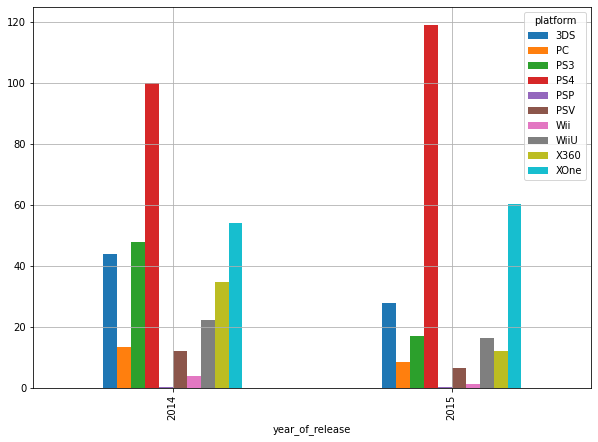

In [ ]:
df_for_plot = good_df.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
df_for_plot.plot(kind='bar',figsize=(10, 7))
plt.grid(True)

*Ориентируюсь на динамику платформ в 2014-2015 годах. По диаграмме можно сказать, что скорее всего: PS4, XOne имеют положительную динамику, их и буду считать потенциально прибыльными. Все остальные платформы показывают отрицательную динамику продаж.*

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [ ]:
good_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,2014.510531,0.201457,0.184886,0.062157,0.056563,94.991575,10.581045,0.505063
std,0.500100,0.501396,0.503424,0.236606,0.157106,20.810190,4.333899,1.167734
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,76.000000,6.900000,0.040000
50%,2015.000000,0.030000,0.030000,0.010000,0.010000,111.000000,8.600000,0.120000
75%,2015.000000,0.165000,0.145000,0.050000,0.040000,111.000000,15.000000,0.440000
max,2015.000000,6.030000,6.310000,3.180000,2.380000,111.000000,15.000000,14.630000


(0.0, 1.7)

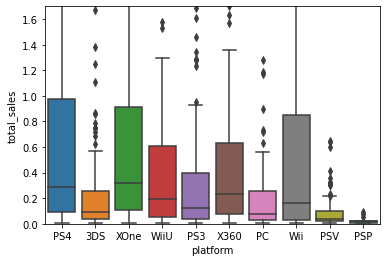

In [ ]:
sns.boxplot(x='platform', y='total_sales', data=good_df).set_ylim(0, 1.7)

*У нас есть 2 явных лидер: PS4 и XOne, у них верхние усы на уровне 1,5 млн.копий. Дальше идет Wii и Х360 - у них от 1,1 до 1,3 млн.копий. И наименьший показатель верхней границы у 3DS, PC и PS3 на уровне 0,5-0,7 млн.копий. Замыкает платформа PSV, у нее верхний ус на отметке 0,2 млн.копий. Медианы у лидеров, а также у Wii и Х360 примерно одинковы, около 0,2 млн.копий.*

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [ ]:
df_ps4 = good_df.loc[(good_df['platform'] == 'PS4') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
8,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
10,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08


In [ ]:
df_ps4 = df_ps4[['total_sales', 'critic_score', 'user_score']]
df_ps4.head()

,total_sales,critic_score,user_score
1,12.62,97.0,8.3
3,8.58,82.0,4.3
5,7.66,83.0,5.7
8,7.17,87.0,6.5
10,6.08,82.0,5.7


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

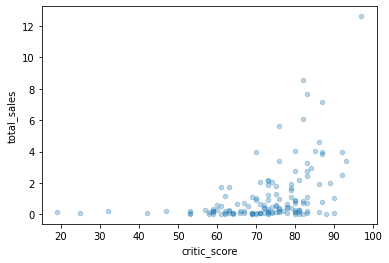

In [ ]:
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

*На диаграмме видно, чем больше рейтинг от критиков, тем больше продано копий игры.*

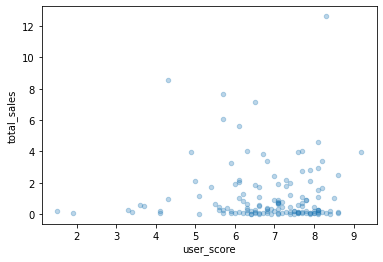

In [ ]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

*Аналогичный результат. Чем выше рейтинг пользователей, тем больше продается копий.*

In [ ]:
df_ps4['critic_score'].corr(df_ps4['total_sales'])

0.42781706672418846

In [ ]:
df_ps4['total_sales'].corr(df_ps4['user_score'])

-0.003282875932011399

*Наблюдается небольшая зависимость количества продаж от оценок критиков. А вот корреляции между количеством продаж и оценками пользователей практически нет. Это означает, что продажи не зависят от оценок пользователей.*

- Соотнесите выводы с продажами игр на других платформах.

In [ ]:
df_3ds = good_df.loc[(good_df['platform'] == '3DS') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_3ds.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
30,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
44,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,3.05
58,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.34
75,Kirby: Triple Deluxe,3DS,2014,Platform,0.61,0.34,0.79,0.09,80.0,8.8,E,1.83
101,Yoshi's New Island,3DS,2014,Platform,0.48,0.53,0.28,0.09,64.0,6.1,E,1.38


In [ ]:
df_3ds = df_3ds[['total_sales', 'critic_score', 'user_score']]
df_3ds.head()

,total_sales,critic_score,user_score
30,3.89,86.0,8.7
44,3.05,66.0,6.9
58,2.34,89.0,9.0
75,1.83,80.0,8.8
101,1.38,64.0,6.1


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

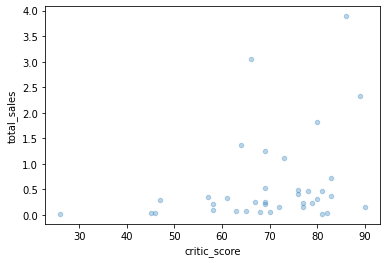

In [ ]:
df_3ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

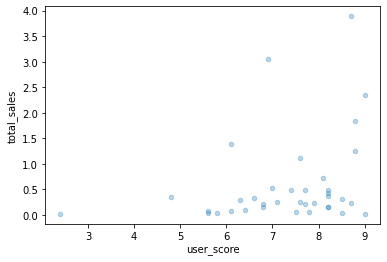

In [ ]:
df_3ds.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_3ds['critic_score'].corr(df_3ds['total_sales'])

0.306044232748583

In [ ]:
df_3ds['total_sales'].corr(df_3ds['user_score'])

0.286141029776063

*У платформы 3DS видна небольшая корреляция количества продаж с оценками критиков и оценками пользователей.*



---



In [ ]:
df_x1 = good_df.loc[(good_df['platform'] == 'XOne') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_x1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
13,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
18,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
24,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
33,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [ ]:
df_x1 = df_x1[['total_sales', 'critic_score', 'user_score']]
df_x1.head()

,total_sales,critic_score,user_score
12,5.47,97.0,7.9
13,5.26,81.0,5.4
18,4.49,84.0,6.4
24,4.22,88.0,6.2
33,3.50,72.0,4.1


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

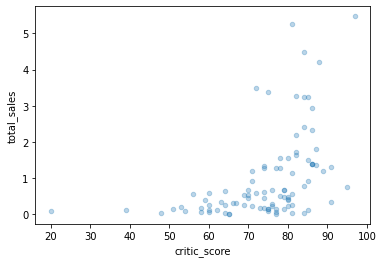

In [ ]:
df_x1.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

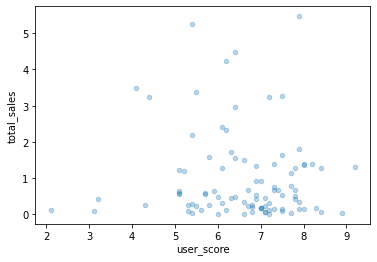

In [ ]:
df_x1.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_x1['critic_score'].corr(df_x1['total_sales'])

0.46624139974786344

In [ ]:
df_x1['total_sales'].corr(df_x1['user_score'])

-0.0620441132995978

*У платформы XOne наблюдается линейная зависимость количества продаж от оценок критиков. А вот корреляции между количеством продаж и оценками пользователей практически нет, она немного отрицательная, но незначительно. Это означает, что продажи не зависят от оценок пользователей. Также видно много выбросов, что может говорить, например, о инертных покупках, сделанных на основании предыдущего опыта использования игровой платформы этого производителя. А оценки критиков, в таком случае, просто куплены производителем.*



---




In [ ]:
df_wii = good_df.loc[(good_df['platform'] == 'WiiU') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_wii.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
19,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
43,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
91,Mario Party 10,WiiU,2015,Misc,0.69,0.53,0.24,0.12,66.0,6.5,E,1.58
96,Donkey Kong Country: Tropical Freeze,WiiU,2014,Platform,0.70,0.55,0.16,0.12,83.0,8.9,E,1.53


In [ ]:
df_wii = df_wii[['total_sales', 'critic_score', 'user_score']]
df_wii.head()

,total_sales,critic_score,user_score
9,7.09,88.0,9.1
19,4.44,81.0,8.5
43,3.21,88.0,8.7
91,1.58,66.0,6.5
96,1.53,83.0,8.9


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

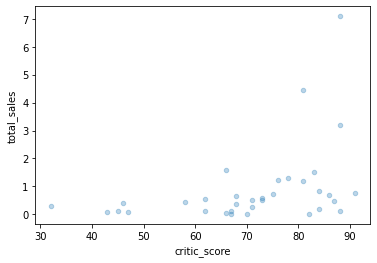

In [ ]:
df_wii.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

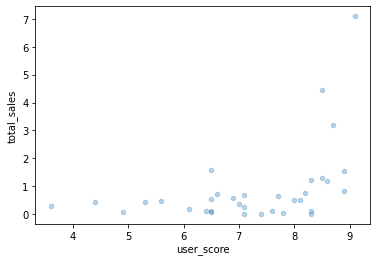

In [ ]:
df_wii.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_wii['critic_score'].corr(df_wii['total_sales'])

0.3891885442392558

In [ ]:
df_wii['total_sales'].corr(df_wii['user_score'])

0.4389858371167049

*У платформы WiiU видна корреляция количества продаж с оценками критиков и оценками пользователей.*



---



In [ ]:
df_ps3 = good_df.loc[(good_df['platform'] == 'PS3') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
114,Assassin's Creed: Rogue,PS3,2014,Action,0.46,0.56,0.06,0.20,72.0,7.5,M,1.28
117,Dark Souls II,PS3,2014,Role-Playing,0.40,0.33,0.40,0.15,91.0,8.1,T,1.28
150,The LEGO Movie Videogame,PS3,2014,Action,0.33,0.43,0.02,0.15,80.0,6.8,E10+,0.93
152,South Park: The Stick of Truth,PS3,2014,Role-Playing,0.43,0.34,0.00,0.16,85.0,8.5,M,0.93
174,WWE 2K15,PS3,2014,Sports,0.36,0.29,0.00,0.13,55.0,3.1,T,0.78


In [ ]:
df_ps3 = df_ps3[['total_sales', 'critic_score', 'user_score']]
df_ps3.head()

,total_sales,critic_score,user_score
114,1.28,72.0,7.5
117,1.28,91.0,8.1
150,0.93,80.0,6.8
152,0.93,85.0,8.5
174,0.78,55.0,3.1


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

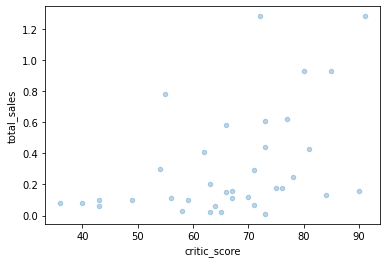

In [ ]:
df_ps3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

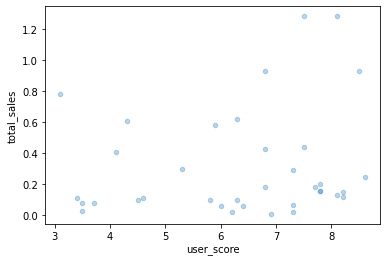

In [ ]:
df_ps3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_ps3['critic_score'].corr(df_ps3['total_sales'])

0.44657460493190704

In [ ]:
df_ps3['total_sales'].corr(df_ps3['user_score'])

0.1565951618135996

*У платформы PS3 наблюдается небольшая зависимость количества продаж от оценок критиков. А вот корреляция между количеством продаж и оценками пользователей крайне мала. Это означает, что продажи почти не зависят от оценок пользователей.*



---



In [ ]:
df_x360 = good_df.loc[(good_df['platform'] == 'X360') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
104,Titanfall,X360,2014,Shooter,0.87,0.34,0.02,0.13,83.0,5.9,M,1.36
116,The LEGO Movie Videogame,X360,2014,Action,0.69,0.47,0.00,0.11,69.0,7.2,E10+,1.27
137,Plants vs. Zombies: Garden Warfare,X360,2014,Shooter,0.51,0.47,0.00,0.09,69.0,7.3,E10+,1.07
139,Assassin's Creed: Rogue,X360,2014,Action,0.58,0.34,0.00,0.09,72.0,7.3,M,1.01
153,South Park: The Stick of Truth,X360,2014,Role-Playing,0.58,0.26,0.00,0.09,82.0,8.4,M,0.93


In [ ]:
df_x360 = df_x360[['total_sales', 'critic_score', 'user_score']]
df_x360.head()

,total_sales,critic_score,user_score
104,1.36,83.0,5.9
116,1.27,69.0,7.2
137,1.07,69.0,7.3
139,1.01,72.0,7.3
153,0.93,82.0,8.4


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

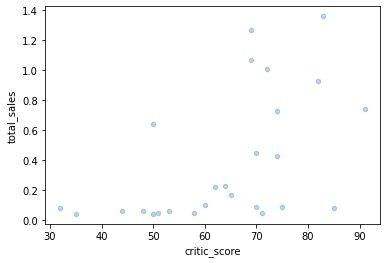

In [ ]:
df_x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

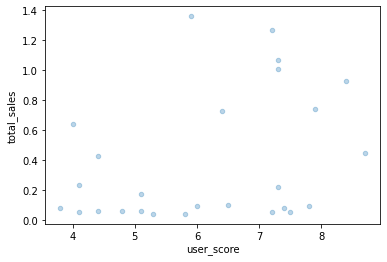

In [ ]:
df_x360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_x360['critic_score'].corr(df_x360['total_sales'])

0.5257228356581523

In [ ]:
df_x360['total_sales'].corr(df_x360['user_score'])

0.3365136248359934

*У платформы X360 видна корреляция количества продаж с оценками критиков и оценками пользователей, хоть и чуть меньше. Также видно выбросы, отнесу их тоже к инертным покупкам.*



---





In [ ]:
df_pc = good_df.loc[(good_df['platform'] == 'PC') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
45,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
113,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
129,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
157,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
188,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73


In [ ]:
df_pc = df_pc[['total_sales', 'critic_score', 'user_score']]
df_pc.head()

,total_sales,critic_score,user_score
45,3.05,70.0,3.9
113,1.28,84.0,5.4
129,1.17,96.0,7.9
157,0.90,71.0,5.7
188,0.73,85.0,5.9


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

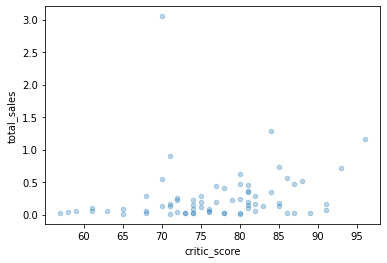

In [ ]:
df_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

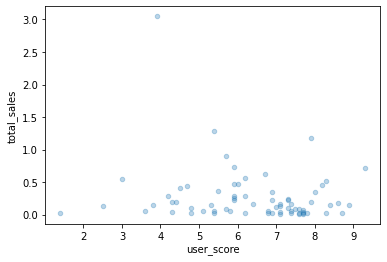

In [ ]:
df_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_pc['critic_score'].corr(df_pc['total_sales'])

0.17682759532666903

In [ ]:
df_pc['total_sales'].corr(df_pc['user_score'])

-0.15929257470097463

*У платформы PC видна совсем небольшая корреляция количества продаж с оценками критиков, а зависимости между продажами и оценками пользователей нет.*



---





In [ ]:
df_psv = good_df.loc[(good_df['platform'] == 'PSV') & (good_df['user_score'] <= 10) & (good_df['critic_score'] <= 100)]
df_psv.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
212,Freedom Wars,PSV,2014,Role-Playing,0.15,0.10,0.32,0.08,73.0,8.3,T,0.65
215,Borderlands 2,PSV,2014,Shooter,0.32,0.16,0.01,0.15,64.0,7.6,M,0.64
338,Sword Art Online: Lost Song,PSV,2015,Role-Playing,0.06,0.04,0.23,0.03,70.0,7.1,T,0.36
359,Hatsune Miku: Project Diva F 2nd,PSV,2014,Misc,0.08,0.05,0.16,0.04,81.0,8.4,T,0.33
360,Persona 4: Dancing All Night,PSV,2015,Misc,0.09,0.04,0.15,0.04,76.0,8.6,T,0.32


In [ ]:
df_psv = df_psv[['total_sales', 'critic_score', 'user_score']]
df_psv.head()

,total_sales,critic_score,user_score
212,0.65,73.0,8.3
215,0.64,64.0,7.6
338,0.36,70.0,7.1
359,0.33,81.0,8.4
360,0.32,76.0,8.6


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

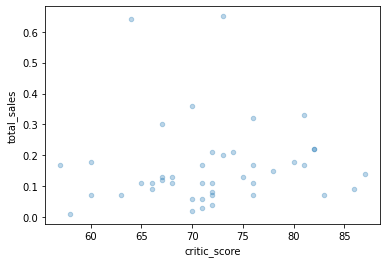

In [ ]:
df_psv.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

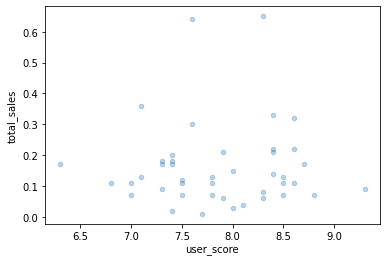

In [ ]:
df_psv.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
xlim=(1,10)

In [ ]:
df_psv['critic_score'].corr(df_psv['total_sales'])

0.06051259272862676

In [ ]:
df_psv['total_sales'].corr(df_psv['user_score'])

0.024140837247422033

*У платформы PSV нет корреляции ни с оценками критиков, ни с оценками пользователей. Также много выбросов.*

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
good_df['genre'].value_counts()

Action          441
Role-Playing    167
Adventure       129
Sports          113
Misc             81
Shooter          81
Racing           45
Fighting         44
Simulation       26
Strategy         24
Platform         23
Puzzle           13
Name: genre, dtype: int64

In [ ]:
df_genre = good_df.groupby('genre').agg({'total_sales':'sum', 'name':'count'}).sort_values(by='name', ascending=False)
df_genre = df_genre.rename(columns={'name':'count_games'})
df_genre = df_genre.reset_index()
df_genre

,genre,total_sales,count_games
0,Action,169.25,441
1,Role-Playing,83.26,167
2,Adventure,13.73,129
3,Sports,85.99,113
4,Misc,34.95,81
5,Shooter,132.72,81
6,Racing,24.73,45
7,Fighting,23.75,44
8,Simulation,11.24,26
9,Strategy,2.83,24


<AxesSubplot:xlabel='genre'>

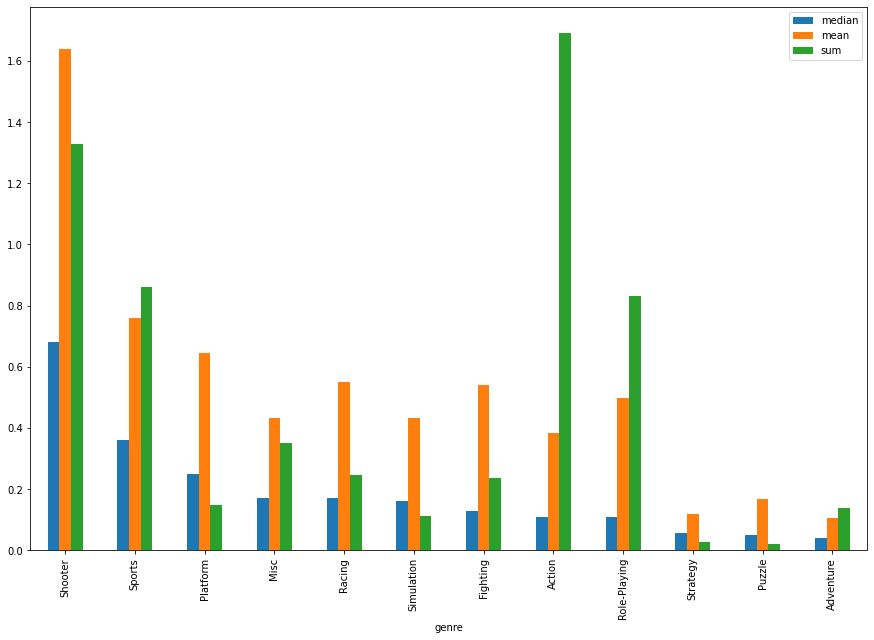

In [ ]:
df_grouped = good_df.groupby('genre').agg({'total_sales': [np.median, np.mean, np.sum]})
df_reduced = df_grouped.loc[:, 'total_sales']
#разделим sum(total_sales) на 100, чтобы привести значения примерно к одному диапазону
df_reduced['sum'] = df_reduced['sum'] / 100
df_reduced = df_reduced.sort_values(by='median', ascending=False)
df_reduced.plot.bar(figsize=(15, 10))

*Самыми прибыльными по медиане и среднему значению являются игры жанров: Shooter и Sports. Жанры игр Strategy и Puzzle являются наименее востребованными. Игры жанра Action имеют больше всего продаж за счет количества игр, при этом медианное и среднее значение в 3 раза меньше, чем у игр жанра Shooter. Считаю, что в 2017 году акцент рекламных кампаний следует делать на жанрах Shooter и Sports.*

# **Портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

- Самые популярные жанры (топ-5). Поясните разницу.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
good_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,111.0,15.0,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,111.0,15.0,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,111.0,15.0,no_rating,7.98


In [ ]:
df_na = good_df.groupby('platform')['na_sales'].sum()
df_na = df_na.sort_values(ascending=False).head()
df_na

platform
PS4     77.12
XOne    67.00
X360    27.61
PS3     21.38
3DS     18.50
Name: na_sales, dtype: float64

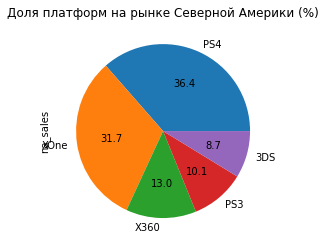

In [ ]:
df_na.plot(kind='pie', autopct='%.1f')
plt.title('Доля платформ на рынке Северной Америки (%)')
plt.show()

*В Северой Америке наиболее популярны игровые платформы PS4 и XOne. Их доля, из ТОП-5, суммарно составляет 68%.*

In [ ]:
df_eu = good_df.groupby('platform')['eu_sales'].sum()
df_eu = df_eu.sort_values(ascending=False).head()
df_eu

platform
PS4     98.26
XOne    36.62
PS3     24.28
X360    14.78
PC      14.44
Name: eu_sales, dtype: float64

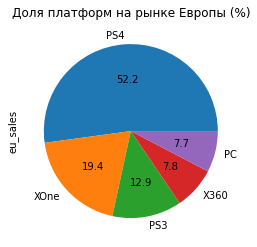

In [ ]:
df_eu.plot(kind='pie', autopct='%.1f')
plt.title('Доля платформ на рынке Европы (%)')
plt.show()

*У пользователей из Европы лидером среди игровых платформ является PS4, с долей 53% среди ТОП-5 игровых платформ.*

In [ ]:
df_jp = good_df.groupby('platform')['jp_sales'].sum()
df_jp = df_jp.sort_values(ascending=False).head()
df_jp

platform
3DS     36.21
PSV     10.98
PS3      9.92
PS4      9.28
WiiU     6.64
Name: jp_sales, dtype: float64

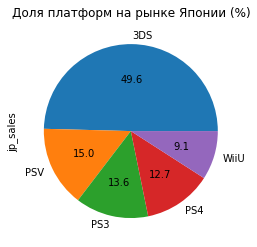

In [ ]:
df_jp.plot(kind='pie', autopct='%.1f')
plt.title('Доля платформ на рынке Японии (%)')
plt.show()

*У пользователей из Японии лидером среди игровых платформ является 3DS, с долей 50% среди ТОП-5 игровых платформ.*



---



In [ ]:
df_na = good_df.groupby('genre')['na_sales'].sum()
df_na = df_na.sort_values(ascending=False).head()
df_na

genre
Action          63.24
Shooter         62.78
Sports          38.59
Role-Playing    27.58
Misc            14.29
Name: na_sales, dtype: float64

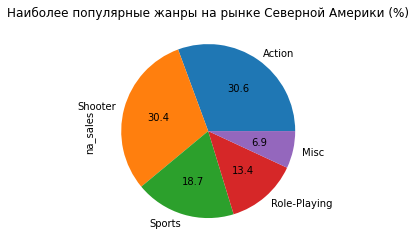

In [ ]:
df_na.plot(kind='pie', autopct='%.1f')
plt.title('Наиболее популярные жанры на рынке Северной Америки (%)')
plt.show()

*В Северой Америке наиболее популярны жанры игр: Shooter и Action. Их доля, из ТОП-5 жанров, суммарно составляет 61%.*

In [ ]:
df_eu = good_df.groupby('genre')['eu_sales'].sum()
df_eu = df_eu.sort_values(ascending=False).head()
df_eu

genre
Action          64.00
Shooter         49.62
Sports          33.72
Role-Playing    23.89
Racing          12.36
Name: eu_sales, dtype: float64

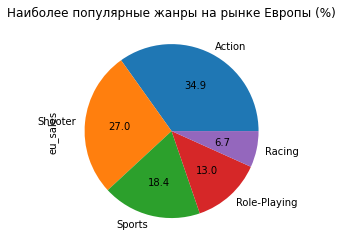

In [ ]:
df_eu.plot(kind='pie', autopct='%.1f')
plt.title('Наиболее популярные жанры на рынке Европы (%)')
plt.show()

*В Европе также, наиболее популярны жанры игр: Shooter и Action. Их доля, из ТОП-5 жанров, суммарно составляет 62%.*

In [ ]:
df_jp = good_df.groupby('genre')['jp_sales'].sum()
df_jp = df_jp.sort_values(ascending=False).head()
df_jp

genre
Role-Playing    24.55
Action          22.51
Fighting         5.62
Misc             4.57
Shooter          3.81
Name: jp_sales, dtype: float64

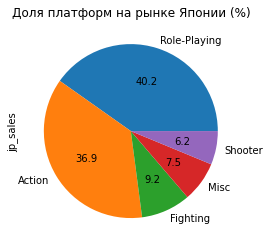

In [ ]:
df_jp.plot(kind='pie', autopct='%.1f')
plt.title('Доля платформ на рынке Японии (%)')
plt.show()

*В Японии картина с жанрами отличается, там популярны жанры игр: Role-Playing и Action. Их доля, из ТОП-5 жанров, суммарно составляет 77%.*

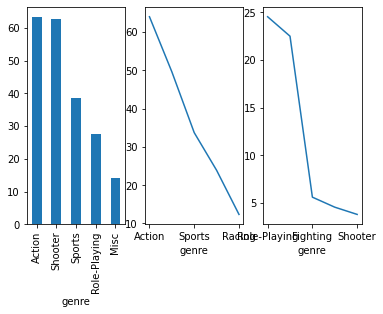

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols =3 )

df_na_for_plot = df_na#.resetIndex()
df_eu_for_plot = df_eu#.resetIndex()
df_jp_for_plot = df_jp#.resetIndex()


df_na_for_plot.plot(kind = 'bar', ax=axes[0]) #set(title='Доля платформ на рынке Северной Америки (%)')
df_eu_for_plot.plot(ax=axes[1]) #.set(title='Доля платформ на рынке Европы (%)')
df_jp_for_plot.plot(ax=axes[2]) #.set(title='Доля платформ на рынке Японии (%)')

plt.show()



---



In [ ]:
df_rating = good_df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()
df_rating = df_rating.rename(columns={'na_sales': 'na_sales', 'eu_sales': 'eu_sales', 'jp_sales': 'jp_sales'})
df_rating = df_rating.reset_index()

na_total = good_df['na_sales'].sum()
eu_total = good_df['eu_sales'].sum()
jp_total = good_df['jp_sales'].sum()


df_rating['na_sales']  = df_rating['na_sales']/na_total * 100
df_rating['eu_sales']  = df_rating['eu_sales']/eu_total * 100
df_rating['jp_sales']  = df_rating['jp_sales']/jp_total * 100


df_rating

/tmp/ipykernel_164/4005251424.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = good_df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()


,rating,na_sales,eu_sales,jp_sales
0,E,17.885669,20.254260,10.666847
1,E10+,12.302931,10.184088,5.435077
2,M,33.768243,35.040554,9.230144
3,T,12.545477,11.063520,16.955815
4,no_rating,23.497679,23.457578,57.712117


<AxesSubplot:xlabel='rating'>

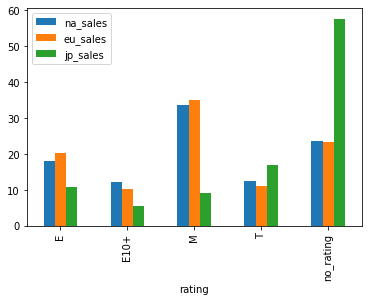

In [ ]:
df_rating.plot.bar(x='rating')

*На диаграмме видно, что в Японии наличие рейтинга не вляет на продажи. Мне кажется это связано с тем, что там играют в игры вообще все и в любом возрасте, поэтому рейтинг нецелесообразен. В Северной Америке и Европе больше всего продаж игр с рейтингом "М" (для взрослых).*

# **Проверка гипотез**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.


Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.



---



Нулевая гипотеза (h0): средние пользовательские рейтинги платформ XOne и PC одинаковые.

Альтернативная гипотеза (h1): средние пользовательские рейтинги платформ XOne и PC отличаются.

In [ ]:
alpha = .05

temp_df = good_df.loc[df['user_score'] != 15]


results = results = st.ttest_ind(
    temp_df.query('platform == "XOne"')['user_score'], 
    temp_df.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем h0")
else:
    print("Не получилось отвергнуть h0")

p-значение: 0.08426290844398646
Не получилось отвергнуть h0


Проверю как отличаются пользовательские рейтинги этих платформ.

In [ ]:
'Средний пользовательский рейтинг XOne =', round(good_df.query('platform == "XOne"')['user_score'].mean(), 2)

('Средний пользовательский рейтинг XOne =', 9.1)

In [ ]:
'Средний пользовательский рейтинг PC = ', round(good_df.query('platform == "PC"')['user_score'].mean(), 2)

('Средний пользовательский рейтинг PC = ', 8.09)

*Т.к. не получилось отвергнуть (h0), это означает, что средние пользовательские рейтинги платформ XOne и PC не отличаются в пределах alpha, таким образом нулевая гипотеза (h0) верна.*



---




Нулевая гипотеза (h0): средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза (h1): средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
alpha = .05 

results = st.ttest_ind(
    df.query('genre == "Action"')['user_score'], 
    df.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем h0")
else:
    print("Не получилось отвергнуть h0")

p-значение: 1.1447363207175422e-06
Отвергаем h0


Проверю как отличаются пользовательские рейтинги этих жанров.

In [ ]:
'Средний пользовательский рейтинг жанра Action =', round(good_df.query('genre == "Action"')['user_score'].mean(), 2)

('Средний пользовательский рейтинг жанра Action =', 11.06)

In [ ]:
'Средний пользовательский рейтинг жанра  Sports =', round(good_df.query('genre == "Sports"')['user_score'].mean(), 2)

('Средний пользовательский рейтинг жанра  Sports =', 7.15)

*Оказалась верна альтернативная гипотеза (h1), это означает, что средние пользовательские рейтинги жанров Action и Sports отличаются. Рейтинг жанра Action выше, чем рейтинг Sports.*

# **Выводы:**

В исследовании участвовали данные 2014 и 2015 года. 
1. Средняя продолжительность "жизни" игровой платформы - 7 лет.
2. Пик популярности около 3,5 лет.
3. PS4 и XOne будут популярны в следующем (2017) году.
4. Наиболее популярные жанры игр, на которые стоит делать акцент при планировании рекламных кампаний - это Shooter и Sports, а если говорить про Японию, то еще и Role-Playing.
5. Игры с рейтингом ESRB "М"- будут пользоваться большим спросом.
6. В целом, если посмотреть данные начиная с 1990 года, видно, что игровые платформы несколько просели, полагаю, что мобильные игры постепенно занимают эту нишу.